## Análisis preliminar Despoblación

En este notebook analizamos algunos datos relevantes así como el comportamiento de algunas de las variables que forman el DataFrame Despoblacion.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
pd.set_option('display.max_columns', None)

In [5]:
Despoblacion = pd.read_csv('/home/dsc/Python/Despoblacion/Union_Depuracion_Data/Despoblacion_11.csv', 
                           dtype = {'Codigo CCAA' : str, 'Codigo Provincia' : str, 'Codigo Municipio' : str})

In [6]:
Despoblacion.head()

,Nombre CCAA,Codigo CCAA,Nombre Provincia,Codigo Provincia,Nombre Municipio,Codigo Municipio,Poblacion Total,Poblacion Hombre,Poblacion Mujer,Superficie Km2,Densidad Poblacion,Altitud Municipios,Nacimientos,Matrimonios,Defunciones,Total Regimen SS,Total Contratos,Contratos Hombres,Contratos Mujeres,Total Paro Registrado,Parados Hombres,Parados Mujeres,Nº Establecimientos Agricultura,Nº Establecimientos Industria,Nº Establecimientos Construccion,Nº Establecimientos Servicios,Nº Centros Sanitarios,Nº Centros Educativos,Número de transacciones anuales 2011,Nº Residencias Mayores,Nº Instituciones Religiosas y Militares,Nº Hombres Extranjeros,Nº Mujeres Extranjeras,Nº Total Extranjeros,Nº Hombres Otra CCAA,Nº Mujeres Otra CCAA,Nº Total Otra CCAA,Nº edificios,Nº Inmuebles,Nº viviendas,Edad < 16,16 =< Edad =<64,Edad >= 65,Soltero/a,Casado/a,Separado/a,Divorciado/a,Viudo/a,Sin Estudios,Con Estudios,Nº de Jubilados,Empresario que emplea personal,Empresario que no emplea personal,1 hijo/a,2 hijos/as,3 hijos/as,4 o más hijos/as,Nº de Alquileres,Hogares Unipersonales,Hogares Familiares,1 persona,2 personas,3 personas,4 personas,5 personas,6 o más personas,Edad Media Edificios,Uso Industrial,Uso Residelcial,Uso Terciario,Otros Usos,Nº Hogares si Internet,Nº Hogares no Internet,Nº Vehiculos,Nº Conductores,Deuda (Miles de €),Total impuestos (Miles de €),Superficie (Ha) Agricolas,Nº Explotaciones Agrícolas,Nº Explotaciones Ganaderas
0,Castilla-La Mancha,08,Albacete,02,Abengibre,02001,902.0,457.0,445.0,30.77,29.31,634.0,5.0,3.0,19.0,266.0,330.0,193.0,137.0,729.0,316.0,413.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,0.0,0.0,40.0,28.0,68.0,16.0,28.0,44.0,455.0,462.0,462.0,75.0,545.0,240.0,295.0,485.0,2.0,2.0,60.0,370.0,390.0,250.0,30.0,115.0,30.0,145.0,50.0,35.0,25.0,50.0,795.0,50.0,185.0,205.0,245.0,100.0,75.0,42.0,183.0,461.0,11.0,4.0,100.0,200.0,814.0,500.0,190.0,200.08,3046.46,199.0,8.0
1,Castilla-La Mancha,08,Albacete,02,Alatoz,02002,604.0,340.0,264.0,63.86,9.46,858.0,1.0,0.0,5.0,94.0,160.0,98.0,62.0,824.0,376.0,448.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,0.0,0.0,32.0,27.0,60.0,16.0,20.0,36.0,495.0,528.0,528.0,65.0,320.0,205.0,205.0,305.0,2.0,15.0,55.0,295.0,190.0,210.0,15.0,55.0,25.0,65.0,50.0,35.0,30.0,70.0,505.0,70.0,200.0,95.0,145.0,55.0,25.0,47.0,168.0,558.0,12.0,4.0,60.0,190.0,468.0,350.0,30.0,221.63,3510.26,182.0,19.0
2,Castilla-La Mancha,08,Albacete,02,Albacete,02003,171390.0,84288.0,87102.0,1126.99,152.08,681.0,1957.0,658.0,1156.0,69496.0,57712.0,30515.0,27197.0,206017.0,97756.0,108261.0,0.0,0.0,0.0,0.0,21.0,128.0,1099.0,9.0,1.0,7104.0,6570.0,13674.0,8684.0,9293.0,17977.0,15346.0,89834.0,83229.0,29940.0,117445.0,23645.0,79255.0,76720.0,2205.0,4325.0,8525.0,32750.0,108345.0,26480.0,5255.0,6020.0,9455.0,21910.0,8840.0,6490.0,20340.0,13445.0,157585.0,13445.0,33800.0,39760.0,58910.0,16345.0,8765.0,26.0,40004.0,82879.0,7400.0,141.0,37410.0,25570.0,118487.0,101310.0,78378.0,67413.35,112129.80,1406.0,159.0
3,Castilla-La Mancha,08,Albacete,02,Albatana,02004,794.0,403.0,391.0,30.50,26.03,582.0,5.0,3.0,5.0,143.0,266.0,204.0,62.0,898.0,336.0,562.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,22.0,19.0,41.0,38.0,40.0,78.0,536.0,570.0,570.0,90.0,470.0,230.0,285.0,415.0,2.0,2.0,60.0,365.0,310.0,235.0,25.0,45.0,2.0,120.0,65.0,35.0,2.0,60.0,700.0,60.0,205.0,140.0,220.0,105.0,55.0,52.0,80.0,454.0,8.0,3.0,35.0,260.0,707.0,489.0,195.0,73.01,2177.74,179.0,23.0
4,Castilla-La Mancha,08,Albacete,02,Alborea,02005,848.0,439.0,409.0,71.87,11.80,706.0,7.0,1.0,15.0,161.0,439.0,259.0,180.0,1069.0,537.0,532.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,0.0,0.0,69.0,69.0,138.0,50.0,66.0,116.0,587.0,636.0,635.0,95.0,510.0,220.0,295.0,430.0,2.0,10.0,85.0,350.0,327.0,215.0,15.0,70.0,35.0,130.0,50.0,35.0,135.0,100.0,705.0,100.0,185.0,140.0,370.0,30.0,2.0,46.0,168.0,680.0,19.0,3.0,115.0,225.0,781.0,454.0,0.0,175.37,3525.71,187.0,6.0


Incluimos la variable objetivo, llamada Umbral, en el DataFrame Despoblacion:
- 1 si es un municipio despoblado (Densidad 2021 <12,5)
- 0 si es un municipio poblado (Densidad 2021 >=12,5) 

Para ello necesitamos la densidad de cada municipio en 2021:

In [7]:
Densidad21 = pd.read_csv('/home/dsc/Python/Despoblacion/Data/03_Output_Densidad_Poblacion_21.csv' ,
                         dtype = {'Codigo Municipio' : str})

In [8]:
Densidad21.head()

,Codigo Municipio,Superficie Km2,Densidad Poblacion
0,01001,19.95,146.62
1,01002,96.30,107.03
2,01003,73.02,19.94
3,01004,27.29,66.29
4,01006,12.97,17.81


In [9]:
Densidad21['Umbral'] = Densidad21['Densidad Poblacion'].map(lambda x: 1 if x < 12.5 else 0)

In [10]:
Densidad21.head()

,Codigo Municipio,Superficie Km2,Densidad Poblacion,Umbral
0,01001,19.95,146.62,0
1,01002,96.30,107.03,0
2,01003,73.02,19.94,0
3,01004,27.29,66.29,0
4,01006,12.97,17.81,0


Merge con la tabla Despoblación para incluir la columna Umbral de 2021:

In [11]:
Despoblacion = Despoblacion.merge(Densidad21, how = 'left', on = 'Codigo Municipio')

In [12]:
Despoblacion.drop(['Superficie Km2_y', 'Densidad Poblacion_y'], axis = 1, inplace = True)
Despoblacion.rename({'Superficie Km2_x' : 'Superficie Km2', 'Densidad Poblacion_x' : 'Densidad Poblacion'},
                   axis = 1, inplace = True)

In [13]:
Despoblacion.head()

,Nombre CCAA,Codigo CCAA,Nombre Provincia,Codigo Provincia,Nombre Municipio,Codigo Municipio,Poblacion Total,Poblacion Hombre,Poblacion Mujer,Superficie Km2,Densidad Poblacion,Altitud Municipios,Nacimientos,Matrimonios,Defunciones,Total Regimen SS,Total Contratos,Contratos Hombres,Contratos Mujeres,Total Paro Registrado,Parados Hombres,Parados Mujeres,Nº Establecimientos Agricultura,Nº Establecimientos Industria,Nº Establecimientos Construccion,Nº Establecimientos Servicios,Nº Centros Sanitarios,Nº Centros Educativos,Número de transacciones anuales 2011,Nº Residencias Mayores,Nº Instituciones Religiosas y Militares,Nº Hombres Extranjeros,Nº Mujeres Extranjeras,Nº Total Extranjeros,Nº Hombres Otra CCAA,Nº Mujeres Otra CCAA,Nº Total Otra CCAA,Nº edificios,Nº Inmuebles,Nº viviendas,Edad < 16,16 =< Edad =<64,Edad >= 65,Soltero/a,Casado/a,Separado/a,Divorciado/a,Viudo/a,Sin Estudios,Con Estudios,Nº de Jubilados,Empresario que emplea personal,Empresario que no emplea personal,1 hijo/a,2 hijos/as,3 hijos/as,4 o más hijos/as,Nº de Alquileres,Hogares Unipersonales,Hogares Familiares,1 persona,2 personas,3 personas,4 personas,5 personas,6 o más personas,Edad Media Edificios,Uso Industrial,Uso Residelcial,Uso Terciario,Otros Usos,Nº Hogares si Internet,Nº Hogares no Internet,Nº Vehiculos,Nº Conductores,Deuda (Miles de €),Total impuestos (Miles de €),Superficie (Ha) Agricolas,Nº Explotaciones Agrícolas,Nº Explotaciones Ganaderas,Umbral
0,Castilla-La Mancha,08,Albacete,02,Abengibre,02001,902.0,457.0,445.0,30.77,29.31,634.0,5.0,3.0,19.0,266.0,330.0,193.0,137.0,729.0,316.0,413.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,0.0,0.0,40.0,28.0,68.0,16.0,28.0,44.0,455.0,462.0,462.0,75.0,545.0,240.0,295.0,485.0,2.0,2.0,60.0,370.0,390.0,250.0,30.0,115.0,30.0,145.0,50.0,35.0,25.0,50.0,795.0,50.0,185.0,205.0,245.0,100.0,75.0,42.0,183.0,461.0,11.0,4.0,100.0,200.0,814.0,500.0,190.0,200.08,3046.46,199.0,8.0,0
1,Castilla-La Mancha,08,Albacete,02,Alatoz,02002,604.0,340.0,264.0,63.86,9.46,858.0,1.0,0.0,5.0,94.0,160.0,98.0,62.0,824.0,376.0,448.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,0.0,0.0,32.0,27.0,60.0,16.0,20.0,36.0,495.0,528.0,528.0,65.0,320.0,205.0,205.0,305.0,2.0,15.0,55.0,295.0,190.0,210.0,15.0,55.0,25.0,65.0,50.0,35.0,30.0,70.0,505.0,70.0,200.0,95.0,145.0,55.0,25.0,47.0,168.0,558.0,12.0,4.0,60.0,190.0,468.0,350.0,30.0,221.63,3510.26,182.0,19.0,1
2,Castilla-La Mancha,08,Albacete,02,Albacete,02003,171390.0,84288.0,87102.0,1126.99,152.08,681.0,1957.0,658.0,1156.0,69496.0,57712.0,30515.0,27197.0,206017.0,97756.0,108261.0,0.0,0.0,0.0,0.0,21.0,128.0,1099.0,9.0,1.0,7104.0,6570.0,13674.0,8684.0,9293.0,17977.0,15346.0,89834.0,83229.0,29940.0,117445.0,23645.0,79255.0,76720.0,2205.0,4325.0,8525.0,32750.0,108345.0,26480.0,5255.0,6020.0,9455.0,21910.0,8840.0,6490.0,20340.0,13445.0,157585.0,13445.0,33800.0,39760.0,58910.0,16345.0,8765.0,26.0,40004.0,82879.0,7400.0,141.0,37410.0,25570.0,118487.0,101310.0,78378.0,67413.35,112129.80,1406.0,159.0,0
3,Castilla-La Mancha,08,Albacete,02,Albatana,02004,794.0,403.0,391.0,30.50,26.03,582.0,5.0,3.0,5.0,143.0,266.0,204.0,62.0,898.0,336.0,562.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,22.0,19.0,41.0,38.0,40.0,78.0,536.0,570.0,570.0,90.0,470.0,230.0,285.0,415.0,2.0,2.0,60.0,365.0,310.0,235.0,25.0,45.0,2.0,120.0,65.0,35.0,2.0,60.0,700.0,60.0,205.0,140.0,220.0,105.0,55.0,52.0,80.0,454.0,8.0,3.0,35.0,260.0,707.0,489.0,195.0,73.01,2177.74,179.0,23.0,0
4,Castilla-La Mancha,08,Albacete,02,Alborea,02005,848.0,439.0,409.0,71.87,11.80,706.0,7.0,1.0,15.0,161.0,439.0,259.0,180.0,1069.0,537.0,532.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,0.0,0.0,69.0,69.0,138.0,50.0,66.0,116.0,587.0,636.0,635.0,95.0,510.0,220.0,295.0,430.0,2.0,10.0,85.0,350.0,327.0,215.0,15.0,70.0,35.0,130.0,50.0,35.0,135.0,100.0,705.0,100.0,185.0,140.0,370.0,30.0,2.0,46.0,168.0,680.0,19.0,3.0,115.0,225.0,781.0,454.0,0.0,175.37,3525.71,187.0,6.0,1


Guardamos el DataFrame definitivo que se utilizará en el ML

In [14]:
Despoblacion.to_csv('Despoblacion.csv', header = True, index = False)

## Datos relevantes

1.CCAA y provincias con más municipios ya despoblados en 2011:

In [101]:
MunicipiosDespoblados = Despoblacion[Despoblacion['Densidad Poblacion'] < 12.5]
MunicipiosDespoblados.head()

,Nombre CCAA,Codigo CCAA,Nombre Provincia,Codigo Provincia,Nombre Municipio,Codigo Municipio,Poblacion Total,Poblacion Hombre,Poblacion Mujer,Superficie Km2,Densidad Poblacion,Altitud Municipios,Nacimientos,Matrimonios,Defunciones,Total Regimen SS,Total Contratos,Contratos Hombres,Contratos Mujeres,Total Paro Registrado,Parados Hombres,Parados Mujeres,Nº Establecimientos Agricultura,Nº Establecimientos Industria,Nº Establecimientos Construccion,Nº Establecimientos Servicios,Nº Centros Sanitarios,Nº Centros Educativos,Número de transacciones anuales 2011,Nº Residencias Mayores,Nº Instituciones Religiosas y Militares,Nº Hombres Extranjeros,Nº Mujeres Extranjeras,Nº Total Extranjeros,Nº Hombres Otra CCAA,Nº Mujeres Otra CCAA,Nº Total Otra CCAA,Nº edificios,Nº Inmuebles,Nº viviendas,Edad < 16,16 =< Edad =<64,Edad >= 65,Soltero/a,Casado/a,Separado/a,Divorciado/a,Viudo/a,Sin Estudios,Con Estudios,Nº de Jubilados,Empresario que emplea personal,Empresario que no emplea personal,1 hijo/a,2 hijos/as,3 hijos/as,4 o más hijos/as,Nº de Alquileres,Hogares Unipersonales,Hogares Familiares,1 persona,2 personas,3 personas,4 personas,5 personas,6 o más personas,Edad Media Edificios,Uso Industrial,Uso Residelcial,Uso Terciario,Otros Usos,Nº Hogares si Internet,Nº Hogares no Internet,Nº Vehiculos,Nº Conductores,Deuda (Miles de €),Total impuestos (Miles de €),Superficie (Ha) Agricolas,Nº Explotaciones Agrícolas,Nº Explotaciones Ganaderas,Umbral
1,Castilla-La Mancha,08,Albacete,02,Alatoz,02002,604.0,340.0,264.0,63.86,9.46,858.0,1.0,0.0,5.0,94.0,160.0,98.0,62.0,824.0,376.0,448.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,0.0,0.0,32.0,27.0,60.0,16.0,20.0,36.0,495.0,528.0,528.0,65.0,320.0,205.0,205.0,305.0,2.0,15.0,55.0,295.0,190.0,210.0,15.0,55.0,25.0,65.0,50.0,35.0,30.0,70.0,505.0,70.0,200.0,95.0,145.0,55.0,25.0,47.0,168.0,558.0,12.0,4.0,60.0,190.0,468.0,350.0,30.0,221.63,3510.26,182.0,19.0,0
4,Castilla-La Mancha,08,Albacete,02,Alborea,02005,848.0,439.0,409.0,71.87,11.80,706.0,7.0,1.0,15.0,161.0,439.0,259.0,180.0,1069.0,537.0,532.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,0.0,0.0,69.0,69.0,138.0,50.0,66.0,116.0,587.0,636.0,635.0,95.0,510.0,220.0,295.0,430.0,2.0,10.0,85.0,350.0,327.0,215.0,15.0,70.0,35.0,130.0,50.0,35.0,135.0,100.0,705.0,100.0,185.0,140.0,370.0,30.0,2.0,46.0,168.0,680.0,19.0,3.0,115.0,225.0,781.0,454.0,0.0,175.37,3525.71,187.0,6.0,0
5,Castilla-La Mancha,08,Albacete,02,Alcadozo,02006,734.0,382.0,352.0,99.59,7.37,925.0,3.0,0.0,11.0,105.0,279.0,148.0,131.0,1356.0,507.0,849.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,13.0,12.0,25.0,15.0,12.0,27.0,333.0,364.0,364.0,110.0,405.0,220.0,295.0,350.0,2.0,2.0,80.0,360.0,230.0,210.0,20.0,45.0,40.0,80.0,65.0,50.0,2.0,35.0,680.0,35.0,165.0,120.0,180.0,150.0,75.0,47.0,178.0,487.0,14.0,1.0,60.0,185.0,575.0,400.0,281.0,236.82,6003.56,131.0,27.0,0
6,Castilla-La Mancha,08,Albacete,02,Alcalá del Júcar,02007,1350.0,709.0,641.0,146.82,9.19,547.0,10.0,4.0,21.0,316.0,362.0,209.0,153.0,1392.0,808.0,584.0,0.0,0.0,0.0,0.0,5.0,2.0,7.0,1.0,0.0,44.0,43.0,86.0,84.0,60.0,144.0,1077.0,1241.0,1211.0,110.0,785.0,440.0,460.0,715.0,2.0,25.0,115.0,630.0,575.0,445.0,90.0,75.0,95.0,165.0,100.0,2.0,50.0,185.0,1135.0,185.0,380.0,210.0,425.0,135.0,2.0,45.0,666.0,1216.0,68.0,6.0,180.0,400.0,1318.0,795.0,0.0,0.00,12862.28,327.0,21.0,0
7,Castilla-La Mancha,08,Albacete,02,Alcaraz,02008,1608.0,800.0,808.0,370.53,4.34,953.0,11.0,7.0,23.0,352.0,266.0,154.0,112.0,2139.0,1084.0,1055.0,0.0,0.0,0.0,0.0,2.0,4.0,6.0,1.0,1.0,27.0,43.0,70.0,79.0,97.0,176.0,932.0,1167.0,1125.0,190.0,1000.0,370.0,675.0,730.0,2.0,45.0,110.0,590.0,760.0,415.0,50.0,110.0,85.0,195.0,85.0,80.0,145.0,120.0,1440.0,120.0,415.0,325.0,360.0,260.0,85.0,53.0,370.0,1208.0,56.0,18.0,195.0,395.0,1373.0,864.0,219.0,476.00,26687.94,412.0,79.0,0


In [102]:
MunicipiosDespoblados = MunicipiosDespoblados.groupby(['Nombre CCAA', 'Nombre Provincia'])['Nombre Municipio'].\
                        count().sort_values(ascending = False)
MunicipiosDespoblados= pd.DataFrame(prueba11).reset_index().drop_duplicates(subset='Nombre CCAA')
MunicipiosDespoblados = MunicipiosDespoblados.rename({'Nombre Municipio' : 'Nº de municipios'}, axis = 1)
MunicipiosDespoblados

,Nombre CCAA,Nombre Provincia,Nº de municipios
0,Castilla y León,Burgos,293
2,Castilla-La Mancha,Guadalajara,242
3,Aragón,Teruel,203
14,Extremadura,Cáceres,111
15,Cataluña,Lleida,110
16,La Rioja,"Rioja, La",90
17,Comunidad Valenciana,Castellón/Castelló,57
26,Andalucía,Almería,33
28,Cantabria,Cantabria,26
30,Comunidad de Madrid,Madrid,24


In [103]:
fig = px.treemap(MunicipiosDespoblados, path=['Nombre CCAA','Nombre Provincia'], values= 'Nº de municipios')
fig.update_traces(root_color="lightgrey")
fig.data[0].texttemplate = "<b>%{label}</b><br>Nº Municipios:%{value}"
fig.update_layout(
  title = 'Nº municipios despoblados por CCAA', 
  title_x = 0.5,
  title_y = 0.95)
fig.show()

2. Superficie Km2, Población total, % de hombres, % de mujeres y densidad media de los años 2011 y 2021

In [ ]:
Para ello vamos a necesitar además de los datos de densidad de 2021, los datos de población de dicho año:

In [107]:
Poblacion21 = pd.read_csv('/home/dsc/Python/Despoblacion/Data/02_Output_Poblacion_21.csv' ,
                         dtype = {'Codigo Municipio' : str})

In [108]:
Despoblacion21 = Densidad21.merge(Poblacion21, how = 'left', on = 'Codigo Municipio')
Despoblacion21 = Despoblacion21.drop('Umbral', axis = 1)
Despoblacion21.head()

,Codigo Municipio,Superficie Km2,Densidad Poblacion,Poblacion Total,Poblacion Hombre,Poblacion Mujer
0,01001,19.95,146.62,2925.0,1517.0,1408.0
1,01002,96.30,107.03,10307.0,5084.0,5223.0
2,01003,73.02,19.94,1456.0,756.0,700.0
3,01004,27.29,66.29,1809.0,888.0,921.0
4,01006,12.97,17.81,231.0,117.0,114.0


In [109]:
print('Indicadores 2011')
print('')

SuperficieTotal = Despoblacion['Superficie Km2'].sum()
print(f'La superficie total del territorio nacinal es: {SuperficieTotal.round(2)} km2')

PoblacionTotal11 = Despoblacion['Poblacion Total'].sum()
print(f'La población total en España en 2011 era de: {PoblacionTotal11} habitantes')

DespoblacionHombres11 = (Despoblacion['Poblacion Hombre'].sum()/Despoblacion['Poblacion Total'].sum())*100
print(f'El porcentaje de hombres en España en 2011 era de: {DespoblacionHombres11.round(2)}%')

DespoblacionMujeres11 = (Despoblacion['Poblacion Mujer'].sum()/Despoblacion['Poblacion Total'].sum())*100
print(f'El porcentaje de mujeres en España en 2011 era de: {DespoblacionMujeres11.round(2)}%')

DespoblacionDensidad11 = round(Despoblacion['Densidad Poblacion'].mean(), 2)
print(f'La media de la densidad de población en 2011 era de: {DespoblacionDensidad11} hab/km2')

Indicadores 2011

La superficie total del territorio nacinal es: 486128.2 km2
La población total en España en 2011 era de: 44293662.0 habitantes
El porcentaje de hombres en España en 2011 era de: 49.35%
El porcentaje de mujeres en España en 2011 era de: 50.65%
La media de la densidad de población en 2011 era de: 160.41 hab/km2


In [110]:
print('Indicadores 2021')
print('')

PoblacionTotal21 = Despoblacion21['Poblacion Total'].sum()
print(f'La población total en España en 2021 era de: {PoblacionTotal21} habitantes')

DespoblacionHombres21 = (Despoblacion21['Poblacion Hombre'].sum()/Despoblacion21['Poblacion Total'].sum())*100
print(f'El porcentaje de hombres en España en 2021 era de: {DespoblacionHombres21.round(2)}%')

DespoblacionMujeres21 = (Despoblacion21['Poblacion Mujer'].sum()/Despoblacion21['Poblacion Total'].sum())*100
print(f'El porcentaje de mujeres en España en 2021 era de: {DespoblacionMujeres21.round(2)}%')

DespoblacionDensidad21 = round(Despoblacion21['Densidad Poblacion'].mean(), 2)
print(f'La media de la densidad de población en 2021 era de: {DespoblacionDensidad21} hab/km2')

Indicadores 2021

La población total en España en 2021 era de: 47385107.0 habitantes
El porcentaje de hombres en España en 2021 era de: 49.01%
El porcentaje de mujeres en España en 2021 era de: 50.99%
La media de la densidad de población en 2021 era de: 178.6 hab/km2


3. Grado de concentración rural 2011 y 2021

In [111]:
print('Grado de concentración rural 2011')
print('')

Despoblado11 = Despoblacion[Despoblacion['Densidad Poblacion']<12.5]

DespobladoSuperficie11 = (Despoblado11['Superficie Km2'].sum()/Despoblacion['Superficie Km2'].sum())*100
print(f'Porcentaje de superficie despoblada en 2011 era de: {DespobladoSuperficie11.round(2)}%')

PorcentajeDespoblado11 = (Despoblado11['Poblacion Total'].sum()/Despoblacion['Poblacion Total'].sum())*100
print(f'Porcentaje de población que vive en territorio despoblado en 2011: {PorcentajeDespoblado11.round(2)}%')

print('')

print('Grado de concentración rural 2021')
print('')

Despoblado21 = Despoblacion21[Despoblacion21['Densidad Poblacion']<12.5]

DespobladoSuperficie21 = (Despoblado21['Superficie Km2'].sum()/Despoblacion21['Superficie Km2'].sum())*100
print(f'Porcentaje de superficie despoblada en 2021 era de: {DespobladoSuperficie21.round(2)}%')

PorcentajeDespoblado21 = (Despoblado21['Poblacion Total'].sum()/Despoblacion21['Poblacion Total'].sum())*100
print(f'Porcentaje de población que vive en territorio despoblado en 2021: {PorcentajeDespoblado21.round(2)}%')


Grado de concentración rural 2011

Porcentaje de superficie despoblada en 2011 era de: 46.12%
Porcentaje de población que vive en territorio despoblado en 2011: 2.85%

Grado de concentración rural 2021

Porcentaje de superficie despoblada en 2021 era de: 48.65%
Porcentaje de población que vive en territorio despoblado en 2021: 2.73%


4. Municipios despoblados 2021 y su situación en 2011.

In [112]:
UmbralDespoblado11 = Despoblacion[Despoblacion['Umbral'] == 0]

In [113]:
print(f'Hay {UmbralDespoblado11.shape[0]} municipios despolbados en 2021')

Hay 3802 municipios despolbados en 2021


In [114]:
Columnas = ['Nombre CCAA', 'Nombre Provincia', 'Codigo Municipio', 
            'Nombre Municipio', 'Poblacion Total', 'Densidad Poblacion', 'Umbral']
UmbralDespoblado11 = UmbralDespoblado11[Columnas].sort_values('Densidad Poblacion', ascending = False)

In [115]:
UmbralDespoblado11 = UmbralDespoblado11[UmbralDespoblado11['Densidad Poblacion'] >= 12.5]
UmbralDespoblado11.head()

,Nombre CCAA,Nombre Provincia,Codigo Municipio,Nombre Municipio,Poblacion Total,Densidad Poblacion,Umbral
2627,Andalucía,Granada,18020,Arenas del Rey,1981.0,21.34,0
2872,Castilla-La Mancha,Guadalajara,19119,Fuencemillán,139.0,19.17,0
3078,Andalucía,Huelva,21017,Calañas,4187.0,17.61,0
7189,Castilla y León,Zamora,49192,San Miguel del Valle,188.0,17.54,0
4352,Andalucía,Málaga,29057,Genalguacil,544.0,17.07,0


In [116]:
print(f'Hay {UmbralDespoblado11.shape[0]} municipios que no estaban despolbados en 2011')

Hay 255 municipios que no estaban despolbados en 2011


In [117]:
UmbralDespoblado11 = UmbralDespoblado11.merge(Despoblacion21, how = 'left', 
                                         on = 'Codigo Municipio', 
                                         suffixes=('11', '21'))
UmbralDespoblado11

,Nombre CCAA,Nombre Provincia,Codigo Municipio,Nombre Municipio,Poblacion Total11,Densidad Poblacion11,Umbral,Superficie Km2,Densidad Poblacion21,Poblacion Total21,Poblacion Hombre,Poblacion Mujer
0,Andalucía,Granada,18020,Arenas del Rey,1981.0,21.34,0,92.81,6.72,624.0,332.0,292.0
1,Castilla-La Mancha,Guadalajara,19119,Fuencemillán,139.0,19.17,0,7.25,11.86,86.0,52.0,34.0
2,Andalucía,Huelva,21017,Calañas,4187.0,17.61,0,237.83,11.62,2763.0,1408.0,1355.0
3,Castilla y León,Zamora,49192,San Miguel del Valle,188.0,17.54,0,10.72,11.94,128.0,67.0,61.0
4,Andalucía,Málaga,29057,Genalguacil,544.0,17.07,0,31.87,12.27,391.0,196.0,195.0
...,...,...,...,...,...,...,...,...,...,...,...,...
250,Castilla y León,León,24006,Ardón,609.0,12.52,0,48.65,11.55,562.0,298.0,264.0
251,Andalucía,Jaén,23048,Iznatoraf,1083.0,12.51,0,86.54,10.48,907.0,455.0,452.0
252,Castilla-La Mancha,Cuenca,16148,Palomares del Campo,763.0,12.51,0,60.98,9.36,571.0,292.0,279.0
253,Castilla y León,Zamora,49132,Moreruela de los Infanzones,391.0,12.51,0,31.26,10.68,334.0,175.0,159.0


In [118]:
UmbralDespoblado11['Descenso Densidad'] = UmbralDespoblado11['Densidad Poblacion21']\
- UmbralDespoblado11['Densidad Poblacion11']


UmbralDespoblado11['Descenso Poblacion'] = UmbralDespoblado11['Poblacion Total21']\
- UmbralDespoblado11['Poblacion Total11']

print('Arenas del Rey municipio de Granada con mayor:\n- descenso de densidad: -14.62\n- descenso de poblacion: -1357')

UmbralDespoblado11.head()

Arenas del Rey municipio de Granada con mayor:
- descenso de densidad: -14.62
- descenso de poblacion: -1357


,Nombre CCAA,Nombre Provincia,Codigo Municipio,Nombre Municipio,Poblacion Total11,Densidad Poblacion11,Umbral,Superficie Km2,Densidad Poblacion21,Poblacion Total21,Poblacion Hombre,Poblacion Mujer,Descenso Densidad,Descenso Poblacion
0,Andalucía,Granada,18020,Arenas del Rey,1981.0,21.34,0,92.81,6.72,624.0,332.0,292.0,-14.62,-1357.0
1,Castilla-La Mancha,Guadalajara,19119,Fuencemillán,139.0,19.17,0,7.25,11.86,86.0,52.0,34.0,-7.31,-53.0
2,Andalucía,Huelva,21017,Calañas,4187.0,17.61,0,237.83,11.62,2763.0,1408.0,1355.0,-5.99,-1424.0
3,Castilla y León,Zamora,49192,San Miguel del Valle,188.0,17.54,0,10.72,11.94,128.0,67.0,61.0,-5.60,-60.0
4,Andalucía,Málaga,29057,Genalguacil,544.0,17.07,0,31.87,12.27,391.0,196.0,195.0,-4.80,-153.0


5. Municipios poblados en 2021 y su situación en 2011

In [119]:
UmbralPoblado11 = Despoblacion[Despoblacion['Umbral'] == 1]

In [120]:
print(f'Hay {UmbralPoblado11.shape[0]} municipios poblados en 2021')

Hay 3750 municipios poblados en 2021


In [121]:
Columnas = ['Nombre CCAA', 'Nombre Provincia', 'Codigo Municipio', 
            'Nombre Municipio', 'Poblacion Total', 'Densidad Poblacion', 'Umbral']
UmbralPoblado11 = UmbralPoblado11[Columnas].sort_values('Densidad Poblacion', ascending = False)

In [122]:
UmbralPoblado11 = UmbralPoblado11[UmbralPoblado11['Densidad Poblacion'] < 12.5]
UmbralPoblado11.head()

,Nombre CCAA,Nombre Provincia,Codigo Municipio,Nombre Municipio,Poblacion Total,Densidad Poblacion,Umbral
2538,Cataluña,Girona,17159,Sant Feliu de Buixalleu,768.0,12.37,1
2713,Andalucía,Granada,18124,Lújar,453.0,12.28,1
6844,Castilla y León,Valladolid,47057,Cubillas de Santa Marta,288.0,12.23,1
2500,Cataluña,Girona,17119,Palau de Santa Eulàlia,104.0,12.04,1
7339,Aragón,Zaragoza,50092,Chiprana,465.0,11.93,1


In [123]:
print(f'Hay {UmbralPoblado11.shape[0]} municipios que estaban despolbados en 2011')

Hay 20 municipios que estaban despolbados en 2011


In [124]:
UmbralPoblado11 = UmbralPoblado11.merge(Despoblacion21, how = 'left', 
                                         on = 'Codigo Municipio', 
                                         suffixes=('11', '21'))
UmbralPoblado11.head()

,Nombre CCAA,Nombre Provincia,Codigo Municipio,Nombre Municipio,Poblacion Total11,Densidad Poblacion11,Umbral,Superficie Km2,Densidad Poblacion21,Poblacion Total21,Poblacion Hombre,Poblacion Mujer
0,Cataluña,Girona,17159,Sant Feliu de Buixalleu,768.0,12.37,1,62.09,13.01,808.0,415.0,393.0
1,Andalucía,Granada,18124,Lújar,453.0,12.28,1,36.88,12.91,476.0,256.0,220.0
2,Castilla y León,Valladolid,47057,Cubillas de Santa Marta,288.0,12.23,1,23.55,14.95,352.0,202.0,150.0
3,Cataluña,Girona,17119,Palau de Santa Eulàlia,104.0,12.04,1,8.64,12.85,111.0,62.0,49.0
4,Aragón,Zaragoza,50092,Chiprana,465.0,11.93,1,38.98,12.90,503.0,266.0,237.0


In [125]:
UmbralPoblado11['Incremento Densidad'] = UmbralPoblado11['Densidad Poblacion21']\
- UmbralPoblado11['Densidad Poblacion11']

UmbralPoblado11['Incremento Poblacion'] = UmbralPoblado11['Poblacion Total21']\
- UmbralPoblado11['Poblacion Total11']

print('Buenavista municipio de Salamanca con mayor:\n- incremento de densidad: 4.40\n- descenso de poblacion: 119')

UmbralPoblado11.sort_values('Incremento Densidad', ascending = False).head()

Buenavista municipio de Salamanca con mayor:
- incremento de densidad: 4.40
- descenso de poblacion: 119


,Nombre CCAA,Nombre Provincia,Codigo Municipio,Nombre Municipio,Poblacion Total11,Densidad Poblacion11,Umbral,Superficie Km2,Densidad Poblacion21,Poblacion Total21,Poblacion Hombre,Poblacion Mujer,Incremento Densidad,Incremento Poblacion
19,Castilla y León,Salamanca,37060,Buenavista,246.0,9.10,1,27.04,13.50,365.0,196.0,169.0,4.40,119.0
15,Aragón,Huesca,22202,Salas Bajas,140.0,10.83,1,12.93,14.93,193.0,95.0,98.0,4.10,53.0
14,Aragón,Huesca,22156,Monflorite-Lascasas,315.0,10.88,1,28.96,14.92,432.0,228.0,204.0,4.04,117.0
16,La Rioja,"Rioja, La",26050,Cirueña,131.0,10.78,1,12.15,14.81,180.0,114.0,66.0,4.03,49.0
12,Castilla y León,Soria,42095,Golmayo,2133.0,11.24,1,189.83,14.98,2844.0,1482.0,1362.0,3.74,711.0


6. Municipios con mayor población

In [126]:
Columnas = ['Nombre CCAA', 'Nombre Provincia', 'Codigo Municipio' ,'Nombre Municipio', 
            'Densidad Poblacion', 'Umbral', 'Poblacion Total']
MayorPoblacion11 = Despoblacion[Columnas].sort_values('Poblacion Total', ascending = False).head(6)

In [127]:
print(f'Hay {MayorPoblacion11.shape[0]} municipios que tienen más de medio millon de habitantes en 2011')
MayorPoblacion11.head(6)

Hay 6 municipios que tienen más de medio millon de habitantes en 2011


,Nombre CCAA,Nombre Provincia,Codigo Municipio,Nombre Municipio,Densidad Poblacion,Umbral,Poblacion Total
4195,Comunidad de Madrid,Madrid,28079,Madrid,5389.90,1,3265038.0
824,Cataluña,Barcelona,08019,Barcelona,16032.63,1,1615448.0
6770,Comunidad Valenciana,Valencia/València,46250,Valencia,5730.11,1,798033.0
5713,Andalucía,Sevilla,41091,Sevilla,4950.85,1,703021.0
7548,Aragón,Zaragoza,50297,Zaragoza,692.74,1,674725.0
4362,Andalucía,Málaga,29067,Málaga,1435.47,1,568030.0


In [128]:
MayorPoblacion11 = MayorPoblacion11.merge(Despoblacion21, how = 'left', 
                                         on = 'Codigo Municipio', 
                                         suffixes=('11', '21'))
MayorPoblacion11

,Nombre CCAA,Nombre Provincia,Codigo Municipio,Nombre Municipio,Densidad Poblacion11,Umbral,Poblacion Total11,Superficie Km2,Densidad Poblacion21,Poblacion Total21,Poblacion Hombre,Poblacion Mujer
0,Comunidad de Madrid,Madrid,28079,Madrid,5389.90,1,3265038.0,605.77,5456.54,3305408.0,1540894.0,1764514.0
1,Cataluña,Barcelona,08019,Barcelona,16032.63,1,1615448.0,100.76,16243.87,1636732.0,778744.0,857988.0
2,Comunidad Valenciana,Valencia/València,46250,Valencia,5730.11,1,798033.0,139.27,5670.60,789744.0,374937.0,414807.0
3,Andalucía,Sevilla,41091,Sevilla,4950.85,1,703021.0,142.00,4818.55,684234.0,324312.0,359922.0
4,Aragón,Zaragoza,50297,Zaragoza,692.74,1,674725.0,974.00,693.33,675301.0,323111.0,352190.0
5,Andalucía,Málaga,29067,Málaga,1435.47,1,568030.0,395.71,1459.16,577405.0,277234.0,300171.0


In [129]:
MayorPoblacion11['Incremento Densidad'] = MayorPoblacion11['Densidad Poblacion21']\
- MayorPoblacion11['Densidad Poblacion11']

MayorPoblacion11['Incremento Poblacion'] = MayorPoblacion11['Poblacion Total21']\
- MayorPoblacion11['Poblacion Total11']

print('- Madrid con mayor incremento de población: 40370.\n- Barcelona con mayor incremento de densidad: 211.24')
print('- Descenso de población en Valencia y Sevilla')
MayorPoblacion11.sort_values('Incremento Poblacion', ascending = False)

- Madrid con mayor incremento de población: 40370.
- Barcelona con mayor incremento de densidad: 211.24
- Descenso de población en Valencia y Sevilla


,Nombre CCAA,Nombre Provincia,Codigo Municipio,Nombre Municipio,Densidad Poblacion11,Umbral,Poblacion Total11,Superficie Km2,Densidad Poblacion21,Poblacion Total21,Poblacion Hombre,Poblacion Mujer,Incremento Densidad,Incremento Poblacion
0,Comunidad de Madrid,Madrid,28079,Madrid,5389.90,1,3265038.0,605.77,5456.54,3305408.0,1540894.0,1764514.0,66.64,40370.0
1,Cataluña,Barcelona,08019,Barcelona,16032.63,1,1615448.0,100.76,16243.87,1636732.0,778744.0,857988.0,211.24,21284.0
5,Andalucía,Málaga,29067,Málaga,1435.47,1,568030.0,395.71,1459.16,577405.0,277234.0,300171.0,23.69,9375.0
4,Aragón,Zaragoza,50297,Zaragoza,692.74,1,674725.0,974.00,693.33,675301.0,323111.0,352190.0,0.59,576.0
2,Comunidad Valenciana,Valencia/València,46250,Valencia,5730.11,1,798033.0,139.27,5670.60,789744.0,374937.0,414807.0,-59.51,-8289.0
3,Andalucía,Sevilla,41091,Sevilla,4950.85,1,703021.0,142.00,4818.55,684234.0,324312.0,359922.0,-132.30,-18787.0


### Análisis variable objetivo: Umbral

In [130]:
Despoblacion['Umbral'].value_counts()

0    3802
1    3750
Name: Umbral, dtype: int64

Variable objetivo muy igualadas.

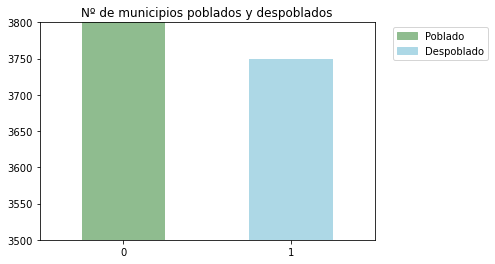

In [131]:
Despoblacion['Umbral'].value_counts().plot(kind="bar",color=['darkseagreen', 'lightblue'])

plt.title('Nº de municipios poblados y despoblados')

plt.xticks(rotation=0)
colors = {'Poblado':'darkseagreen', 'Despoblado':'lightblue'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, bbox_to_anchor=(1.04, 1))
plt.ylim(3500, 3800)
plt.show()

### Análisis descriptivo

In [132]:
Descriptivo = Despoblacion.describe().apply(lambda s: s.apply('{0:.2f}'.format))
Descriptivo

,Poblacion Total,Poblacion Hombre,Poblacion Mujer,Superficie Km2,Densidad Poblacion,Altitud Municipios,Nacimientos,Matrimonios,Defunciones,Total Regimen SS,Total Contratos,Contratos Hombres,Contratos Mujeres,Total Paro Registrado,Parados Hombres,Parados Mujeres,Nº Establecimientos Agricultura,Nº Establecimientos Industria,Nº Establecimientos Construccion,Nº Establecimientos Servicios,Nº Centros Sanitarios,Nº Centros Educativos,Número de transacciones anuales 2011,Nº Residencias Mayores,Nº Instituciones Religiosas y Militares,Nº Hombres Extranjeros,Nº Mujeres Extranjeras,Nº Total Extranjeros,Nº Hombres Otra CCAA,Nº Mujeres Otra CCAA,Nº Total Otra CCAA,Nº edificios,Nº Inmuebles,Nº viviendas,Edad < 16,16 =< Edad =<64,Edad >= 65,Soltero/a,Casado/a,Separado/a,Divorciado/a,Viudo/a,Sin Estudios,Con Estudios,Nº de Jubilados,Empresario que emplea personal,Empresario que no emplea personal,1 hijo/a,2 hijos/as,3 hijos/as,4 o más hijos/as,Nº de Alquileres,Hogares Unipersonales,Hogares Familiares,1 persona,2 personas,3 personas,4 personas,5 personas,6 o más personas,Edad Media Edificios,Uso Industrial,Uso Residelcial,Uso Terciario,Otros Usos,Nº Hogares si Internet,Nº Hogares no Internet,Nº Vehiculos,Nº Conductores,Deuda (Miles de €),Total impuestos (Miles de €),Superficie (Ha) Agricolas,Nº Explotaciones Agrícolas,Nº Explotaciones Ganaderas,Umbral
count,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00
mean,5865.16,2894.69,2970.46,64.37,160.41,629.72,58.52,19.99,47.73,2080.25,1782.85,979.63,803.22,6454.15,3192.29,3261.86,11.69,12.70,16.19,121.62,1.76,4.21,42.57,0.52,0.17,405.34,394.52,799.87,403.90,454.99,858.88,1258.91,3297.65,3157.68,933.98,3873.64,978.03,2519.22,2638.32,83.94,185.02,354.20,1262.91,3564.18,1096.29,171.54,236.18,418.18,736.32,285.98,196.07,805.26,516.71,5251.93,516.71,1343.92,1456.76,1668.12,539.65,261.01,44.35,1245.31,3015.60,256.39,12.14,1244.78,995.39,4189.91,3244.19,3600.76,2356.81,3906.47,162.88,56.62,0.50
std,48779.77,23115.50,25672.07,94.55,826.66,343.62,488.23,184.79,406.66,25154.01,17644.21,8883.80,8799.35,45722.50,22596.62,23174.54,44.93,73.60,130.39,1731.90,3.69,28.09,310.99,3.59,1.70,4281.66,4722.51,8996.11,5050.49,6620.65,11666.93,3330.69,24837.54,23454.51,7067.03,31896.04,9030.69,21992.26,20138.26,787.81,1769.46,3282.08,8232.83,32722.94,9547.13,1211.60,1726.66,3601.86,5893.83,2340.09,1544.22,10155.87,5476.74,42476.88,5476.74,12271.19,11575.45,12345.48,4304.91,2190.19,12.76,9081.62,21714.27,2299.36,62.70,12308.29,7398.71,30481.91,25283.90,76799.59,25950.70,6691.05,286.53,169.96,0.50
min,5.00,3.00,2.00,0.03,0.29,1.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,6.00,7.00,0.00,2.00,2.00,0.00,2.00,2.00,2.00,0.00,2.00,4.00,0.00,0.00,0.00,2.00,0.00,2.00,0.00,0.00,2.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00,5.00,0.00,0.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,175.00,93.75,81.00,19.29,5.37,355.00,0.00,0.00,2.00,34.00,18.00,12.00,5.00,85.00,45.00,38.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,3.00,3.00,7.00,7.00,6.00,13.00,171.75,181.00,181.00,10.00,95.00,55.00,65.00,85.00,2.00,2.00,15.00,55.00,80.00,55.00,2.00,15.00,5.00,20.00,10.00,2.00,2.00,25.00,140.00,25.00,50.00,40.00,35.00,10.00,2.00,34.00,82.00,178.00,5.00,1.00,15.00,55.00,159.00,90.00,0.00,32.63,885.23,30.00,5.00,0.00
50%,569.00,298.00,274.00,36.11,14.02,694.00,3.00,1.00,7.00,128.00,96.00,58.00,34.00,417.50,21

Mayores valores extremos:

In [133]:
Descriptivo = Descriptivo.astype(float).round(2)
Diferencia = Descriptivo.iloc[7] - Descriptivo.iloc[3]
Diferencia.sort_values(ascending = False)

Deuda (Miles de €)                         6347900.0
Poblacion Total                            3265033.0
Hogares Familiares                         2806763.0
Total Paro Registrado                      2636964.0
Con Estudios                               2208071.0
                                             ...    
Nº Residencias Mayores                         222.0
Nº Centros Sanitarios                          187.0
Nº Instituciones Religiosas y Militares        102.0
Edad Media Edificios                            61.0
Umbral                                           1.0
Length: 75, dtype: float64

In [134]:
Descriptivo[['Deuda (Miles de €)', 'Poblacion Total', 'Hogares Familiares', 
             'Total Paro Registrado', 'Con Estudios']] #tablas con valores más extremos

,Deuda (Miles de €),Poblacion Total,Hogares Familiares,Total Paro Registrado,Con Estudios
count,7552.00,7552.00,7552.00,7552.00,7552.00
mean,3600.76,5865.16,5251.93,6454.15,3564.18
std,76799.59,48779.77,42476.88,45722.50,32722.94
min,0.00,5.00,2.00,0.00,4.00
25%,0.00,175.00,140.00,85.00,80.00
50%,56.00,569.00,477.50,417.50,290.00
75%,556.50,2460.25,2170.00,2308.50,1325.00
max,6347900.00,3265038.00,2806765.00,2636964.00,2208075.00


### Análisis multivariante

Para algunas de las siguientes visualizaciones, necesitamos segmentar el DataFrame en dos, Despoblado y Poblado:

In [135]:
Despoblado = Despoblacion[Despoblacion['Umbral'] == 0]
Poblado = Despoblacion[Despoblacion['Umbral'] == 1]

DataFrame con un rango de valores muy amplio.  
Las variables relacionadas con la población, calculamos % respecto al total de población de cada municipio.  
El resto, escala logarítmica en el eje y.

Població hombre y mujer segmentada por municipios despoblados y poblados:

In [136]:
Despoblado = Despoblado.copy()
Poblado = Poblado.copy()
Poblado['PorcentHombre'] = (Poblado['Poblacion Hombre'] / Poblado['Poblacion Total'])*100
Despoblado['PorcentHombre'] = (Despoblado['Poblacion Hombre'] / Despoblado['Poblacion Total'])*100
Poblado['PorcentMujer'] = (Poblado['Poblacion Mujer'] / Poblado['Poblacion Total'])*100
Despoblado['PorcentMujer'] = (Despoblado['Poblacion Mujer'] / Despoblado['Poblacion Total'])*100

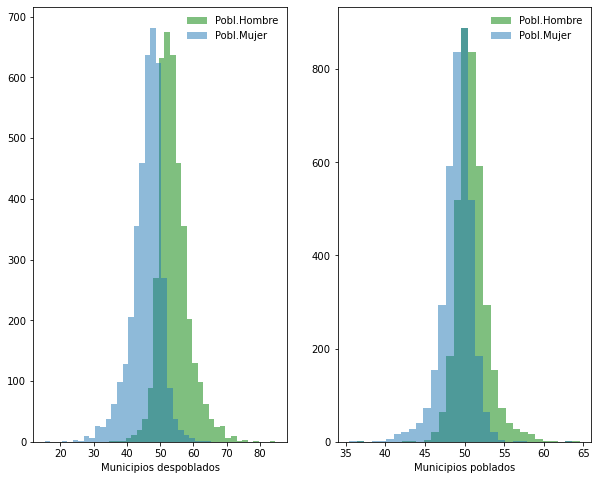

In [137]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,8))

ax1.hist(Despoblado['PorcentHombre'], bins = 30, color='green', alpha = .5, label = 'Pobl.Hombre')
ax1.hist(Despoblado['PorcentMujer'], bins = 30, alpha = .5, label = 'Pobl.Mujer')

ax2.hist(Poblado['PorcentHombre'], bins = 30, color='green', alpha = .5, label = 'Pobl.Hombre')
ax2.hist(Poblado['PorcentMujer'], bins = 30, alpha = .5, label = 'Pobl.Mujer')


ax1.set_xlabel('Municipios despoblados')
ax2.set_xlabel('Municipios poblados')
ax1.legend(frameon=False)
ax2.legend(frameon=False)

plt.show()

Nacimientos y defunciones segmentado por municipios despoblados y poblados:

In [138]:
Poblado['PorcentNacimientos'] = (Poblado['Nacimientos'] / Poblado['Poblacion Total'])*100
Despoblado['PorcentNacimientos'] = (Despoblado['Nacimientos'] / Despoblado['Poblacion Total'])*100
Poblado['PorcentDefunciones'] = (Poblado['Defunciones'] / Poblado['Poblacion Total'])*100
Despoblado['PorcentDefunciones'] = (Despoblado['Defunciones'] / Despoblado['Poblacion Total'])*100

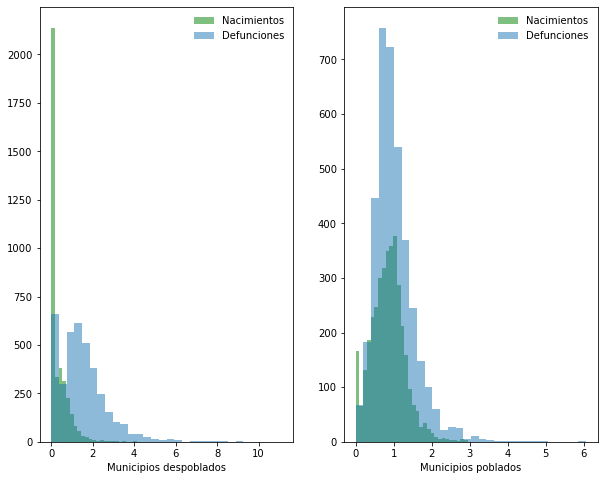

In [139]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,8))

ax1.hist(Despoblado['PorcentNacimientos'], bins = 30, color='green', alpha = .5, label = 'Nacimientos')
ax1.hist(Despoblado['PorcentDefunciones'], bins = 30, alpha = .5, label = 'Defunciones')

ax2.hist(Poblado['PorcentNacimientos'], bins = 30, color='green', alpha = .5, label = 'Nacimientos')
ax2.hist(Poblado['PorcentDefunciones'], bins = 30, alpha = .5, label = 'Defunciones')


ax1.set_xlabel('Municipios despoblados')
ax2.set_xlabel('Municipios poblados')
ax1.legend(frameon=False)
ax2.legend(frameon=False)

plt.show()

Población igual o mayor a 65 años segmentada por municipios despoblados y poblados:

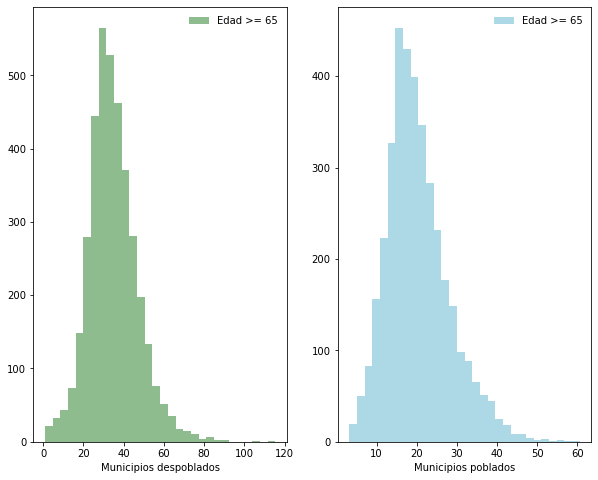

In [140]:
Poblado['Porcent65'] = (Poblado['Edad >= 65'] / Poblado['Poblacion Total'])*100
Despoblado['Porcent65'] = (Despoblado['Edad >= 65'] / Despoblado['Poblacion Total'])*100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,8))

ax1.hist(Despoblado['Porcent65'], bins = 30, color='darkseagreen', label = 'Edad >= 65')
ax2.hist(Poblado['Porcent65'], bins = 30, color='lightblue', label = 'Edad >= 65')

ax1.set_xlabel('Municipios despoblados')
ax2.set_xlabel('Municipios poblados')
ax1.legend(frameon=False)
ax2.legend(frameon=False)

plt.show()

Población con y sin estudios segmentada por municipios despoblados y poblados:

In [141]:
Poblado['PorcentEstudios'] = (Poblado['Con Estudios'] / Poblado['Poblacion Total'])*100
Despoblado['PorcentEstudios'] = (Despoblado['Con Estudios'] / Despoblado['Poblacion Total'])*100
Poblado['PorcentNoEstudios'] = (Poblado['Sin Estudios'] / Poblado['Poblacion Total'])*100
Despoblado['PorcentNoEstudios'] = (Despoblado['Sin Estudios'] / Despoblado['Poblacion Total'])*100

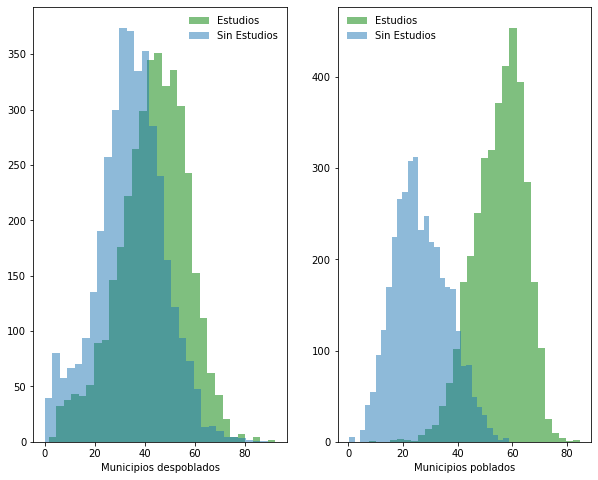

In [142]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,8))

ax1.hist(Despoblado['PorcentEstudios'], bins = 30, color='green', alpha = .5, label = 'Estudios')
ax1.hist(Despoblado['PorcentNoEstudios'], bins = 30, alpha = .5, label = 'Sin Estudios')

ax2.hist(Poblado['PorcentEstudios'], bins = 30, color='green', alpha = .5, label = 'Estudios')
ax2.hist(Poblado['PorcentNoEstudios'], bins = 30, alpha = .5, label = 'Sin Estudios')


ax1.set_xlabel('Municipios despoblados')
ax2.set_xlabel('Municipios poblados')
ax1.legend(frameon=False)
ax2.legend(frameon=False)

plt.show()

In [143]:
Despoblado[Despoblado['PorcentEstudios']>80]

,Nombre CCAA,Codigo CCAA,Nombre Provincia,Codigo Provincia,Nombre Municipio,Codigo Municipio,Poblacion Total,Poblacion Hombre,Poblacion Mujer,Superficie Km2,Densidad Poblacion,Altitud Municipios,Nacimientos,Matrimonios,Defunciones,Total Regimen SS,Total Contratos,Contratos Hombres,Contratos Mujeres,Total Paro Registrado,Parados Hombres,Parados Mujeres,Nº Establecimientos Agricultura,Nº Establecimientos Industria,Nº Establecimientos Construccion,Nº Establecimientos Servicios,Nº Centros Sanitarios,Nº Centros Educativos,Número de transacciones anuales 2011,Nº Residencias Mayores,Nº Instituciones Religiosas y Militares,Nº Hombres Extranjeros,Nº Mujeres Extranjeras,Nº Total Extranjeros,Nº Hombres Otra CCAA,Nº Mujeres Otra CCAA,Nº Total Otra CCAA,Nº edificios,Nº Inmuebles,Nº viviendas,Edad < 16,16 =< Edad =<64,Edad >= 65,Soltero/a,Casado/a,Separado/a,Divorciado/a,Viudo/a,Sin Estudios,Con Estudios,Nº de Jubilados,Empresario que emplea personal,Empresario que no emplea personal,1 hijo/a,2 hijos/as,3 hijos/as,4 o más hijos/as,Nº de Alquileres,Hogares Unipersonales,Hogares Familiares,1 persona,2 personas,3 personas,4 personas,5 personas,6 o más personas,Edad Media Edificios,Uso Industrial,Uso Residelcial,Uso Terciario,Otros Usos,Nº Hogares si Internet,Nº Hogares no Internet,Nº Vehiculos,Nº Conductores,Deuda (Miles de €),Total impuestos (Miles de €),Superficie (Ha) Agricolas,Nº Explotaciones Agrícolas,Nº Explotaciones Ganaderas,Umbral,PorcentHombre,PorcentMujer,PorcentNacimientos,PorcentDefunciones,Porcent65,PorcentEstudios,PorcentNoEstudios
1146,Castilla y León,07,Burgos,09,Barbadillo del Pez,09039,80.0,52.0,28.0,20.76,3.85,1049.0,0.0,0.0,1.0,14.0,1.0,1.0,0.0,71.0,44.0,27.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,8.0,17.0,3.0,0.0,3.0,171.0,171.0,171.0,2.0,2.0,50.0,2.0,2.0,2.0,2.0,25.0,2.0,67.0,55.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,50.0,2.0,65.0,2.0,2.0,2.0,2.0,60.0,127.0,168.0,6.0,0.0,2.0,45.0,98.0,38.0,0.0,35.00,1109.78,8.0,4.0,0,65.000000,35.000000,0.000000,1.250000,62.500000,83.750000,2.500000
1464,Castilla y León,07,Burgos,09,Villaquirán de la Puebla,09455,51.0,32.0,19.0,11.48,4.44,813.0,0.0,0.0,1.0,10.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,45.0,47.0,47.0,2.0,30.0,20.0,20.0,25.0,2.0,2.0,2.0,2.0,47.0,15.0,2.0,20.0,2.0,2.0,2.0,2.0,5.0,2.0,50.0,2.0,5.0,30.0,2.0,5.0,5.0,61.0,89.0,44.0,3.0,1.0,2.0,2.0,48.0,31.0,0.0,13.10,1135.81,15.0,3.0,0,62.745098,37.254902,0.000000,1.960784,39.215686,92.156863,3.921569
2785,Castilla-La Mancha,08,Guadalajara,19,Albendiego,19008,43.0,30.0,13.0,22.91,1.88,1189.0,0.0,0.0,1.0,10.0,7.0,5.0,2.0,36.0,36.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,5.0,20.0,76.0,79.0,79.0,5.0,30.0,2.0,25.0,10.0,2.0,2.0,2.0,2.0,37.0,10.0,2.0,2.0,2.0,2.0,2.0,2.0,10.0,10.0,25.0,10.0,2.0,20.0,10.0,2.0,2.0,58.0,74.0,77.0,4.0,2.0,2.0,15.0,36.0,19.0,0.0,8.70,1079.33,7.0,2.0,0,69.767442,30.232558,0.000000,2.325581,4.651163,86.046512,4.651163
5443,Castilla y León,07,Segovia,40,Cabañas de Polendos,40035,156.0,83.0,73.0,26.41,5.91,939.0,6.0,2.0,0.0,36.0,10.0,7.0,3.0,100.0,52.0,48.0,2.0,1.0,1.0,6.0,2.0,0.0,1.0,0.0,0.0,7.0,6.0,14.0,19.0,17.0,36.0,142.0,158.0,158.0,25.0,130.0,30.0,60.0,100.0,2.0,15.0,10.0,30.0,130.0,45.0,2.0,15.0,20.0,10.0,10.0,5.0,2.0,25.0,155.0,25.0,70.0,50.0,20.0,25.0,2.0,48.0,168.0,178.0,15.0,4.0,50.0,35.0,146.0,116.0,44.0,0.00,2654.69,35.0,10.0,0,53.205128,46.794872,3.846154,0.000000,19.230769,83.333333,19.230769
5811,Castilla y León,07,Soria,42,Herrera de Soria,42098,14.0,10.0,4.0,26.07,0.54,1095.0,0.0,0.0,0.0,4.0,6.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,47.0,47.0,47.0,2.0,5.0,2.0,10.0,2.0,2.0,2.0,2.0,2.0,12.0,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,47.0,58.0,40.0,2.0,0.0,2.0,5.0,11.0,8.0,0.0,3.55,550.42,5.0,1.0,0,71.428571,28.571429,0.000000,0.000000,14.285714,85.714286,14.285714
6111,Aragón,02,Teruel,44,Anadón,44024,24.0,15.0,9.0,24.62,0.97,1113.0,0.0,0.0,0.0,6.0,3.0,2.0,1.0,1.0,1.0,0.0,1.0

Nº de hogares sin internet segmentados por municipios despoblados y poblados:

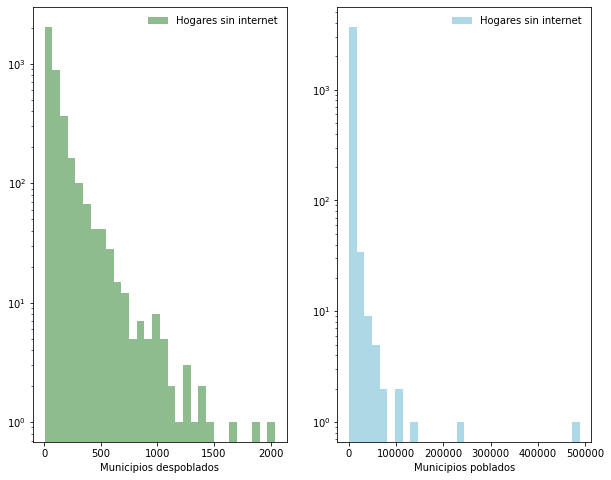

In [144]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,8))

ax1.hist(Despoblado['Nº Hogares no Internet'], bins = 30, color='darkseagreen', label = 'Hogares sin internet')
ax2.hist(Poblado['Nº Hogares no Internet'], bins = 30, color='lightblue', label = 'Hogares sin internet')

ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xlabel('Municipios despoblados')
ax2.set_xlabel('Municipios poblados')
ax1.legend(frameon=False)
ax2.legend(frameon=False)

plt.show()

Nº de transacciones inmobiliarias anuales segmentadas por municipios despoblados y poblados:

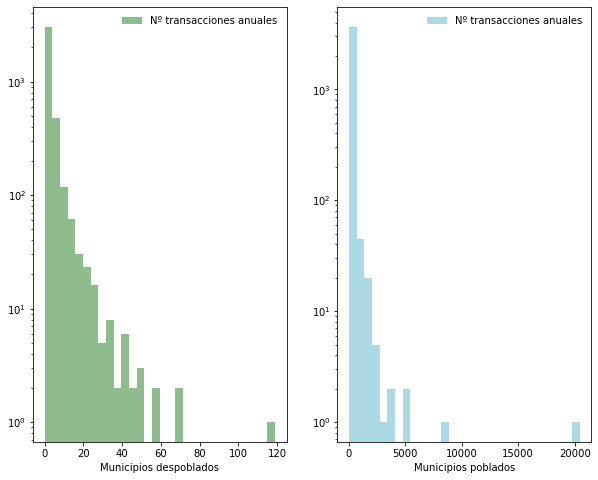

In [145]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,8))

ax1.hist(Despoblado['Número de transacciones anuales 2011'], bins = 30, color='darkseagreen', label = 'Nº transacciones anuales')
ax2.hist(Poblado['Número de transacciones anuales 2011'], bins = 30, color='lightblue', label = 'Nº transacciones anuales')

ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xlabel('Municipios despoblados')
ax2.set_xlabel('Municipios poblados')
ax1.legend(frameon=False)
ax2.legend(frameon=False)

plt.show()

In [146]:
Despoblado[Despoblado['Número de transacciones anuales 2011'] >= 45]

,Nombre CCAA,Codigo CCAA,Nombre Provincia,Codigo Provincia,Nombre Municipio,Codigo Municipio,Poblacion Total,Poblacion Hombre,Poblacion Mujer,Superficie Km2,Densidad Poblacion,Altitud Municipios,Nacimientos,Matrimonios,Defunciones,Total Regimen SS,Total Contratos,Contratos Hombres,Contratos Mujeres,Total Paro Registrado,Parados Hombres,Parados Mujeres,Nº Establecimientos Agricultura,Nº Establecimientos Industria,Nº Establecimientos Construccion,Nº Establecimientos Servicios,Nº Centros Sanitarios,Nº Centros Educativos,Número de transacciones anuales 2011,Nº Residencias Mayores,Nº Instituciones Religiosas y Militares,Nº Hombres Extranjeros,Nº Mujeres Extranjeras,Nº Total Extranjeros,Nº Hombres Otra CCAA,Nº Mujeres Otra CCAA,Nº Total Otra CCAA,Nº edificios,Nº Inmuebles,Nº viviendas,Edad < 16,16 =< Edad =<64,Edad >= 65,Soltero/a,Casado/a,Separado/a,Divorciado/a,Viudo/a,Sin Estudios,Con Estudios,Nº de Jubilados,Empresario que emplea personal,Empresario que no emplea personal,1 hijo/a,2 hijos/as,3 hijos/as,4 o más hijos/as,Nº de Alquileres,Hogares Unipersonales,Hogares Familiares,1 persona,2 personas,3 personas,4 personas,5 personas,6 o más personas,Edad Media Edificios,Uso Industrial,Uso Residelcial,Uso Terciario,Otros Usos,Nº Hogares si Internet,Nº Hogares no Internet,Nº Vehiculos,Nº Conductores,Deuda (Miles de €),Total impuestos (Miles de €),Superficie (Ha) Agricolas,Nº Explotaciones Agrícolas,Nº Explotaciones Ganaderas,Umbral,PorcentHombre,PorcentMujer,PorcentNacimientos,PorcentDefunciones,Porcent65,PorcentEstudios,PorcentNoEstudios
597,Extremadura,11,Badajoz,06,Cabeza del Buey,06023,5365.0,2648.0,2717.0,475.02,11.29,531.0,32.0,10.0,87.0,1319.0,1394.0,979.0,415.0,8088.0,3829.0,4259.0,0.0,0.0,0.0,0.0,2.0,9.0,59.0,1.0,3.0,23.0,45.0,68.0,256.0,252.0,508.0,2835.0,3455.0,3428.0,630.0,3255.0,1315.0,2160.0,2460.0,100.0,90.0,390.0,2120.0,2430.0,1285.0,205.0,350.0,270.0,750.0,285.0,180.0,165.0,425.0,4730.0,425.0,1095.0,1100.0,1840.0,555.0,185.0,44.0,523.0,3189.0,96.0,31.0,830.0,1115.0,3614.0,2869.0,1520.0,1361.08,36927.34,578.0,204.0,0,49.356943,50.643057,0.596459,1.621622,24.510718,45.293569,39.515377
1567,Extremadura,11,Cáceres,10,"Gordo, El",10085,385.0,203.0,182.0,77.04,5.00,320.0,1.0,2.0,4.0,214.0,445.0,270.0,175.0,505.0,213.0,292.0,1.0,2.0,3.0,9.0,1.0,0.0,119.0,0.0,0.0,10.0,13.0,23.0,51.0,48.0,99.0,352.0,359.0,359.0,35.0,245.0,105.0,150.0,205.0,2.0,2.0,25.0,165.0,152.0,110.0,2.0,2.0,25.0,45.0,20.0,20.0,25.0,45.0,325.0,45.0,130.0,120.0,65.0,2.0,20.0,42.0,136.0,363.0,6.0,2.0,50.0,125.0,262.0,168.0,0.0,255.94,4714.31,24.0,9.0,0,52.727273,47.272727,0.259740,1.038961,27.272727,39.480519,42.857143
1598,Extremadura,11,Cáceres,10,Malpartida de Plasencia,10116,4716.0,2379.0,2337.0,372.65,12.66,467.0,56.0,11.0,42.0,1054.0,977.0,581.0,396.0,6719.0,3049.0,3670.0,35.0,31.0,47.0,67.0,1.0,4.0,45.0,2.0,0.0,77.0,75.0,152.0,288.0,227.0,515.0,2170.0,2543.0,2541.0,780.0,3055.0,845.0,1950.0,2320.0,40.0,125.0,240.0,1050.0,2790.0,910.0,190.0,210.0,230.0,560.0,350.0,185.0,60.0,385.0,4200.0,385.0,1175.0,1315.0,1310.0,455.0,35.0,38.0,516.0,2754.0,90.0,5.0,840.0,1000.0,3542.0,2744.0,82.0,964.15,34557.19,340.0,203.0,0,50.445293,49.554707,1.187447,0.890585,17.917727,59.160305,22.264631
3186,Aragón,02,Huesca,22,Benasque,22054,2236.0,1167.0,1069.0,233.32,9.58,1140.0,16.0,8.0,6.0,1135.0,1224.0,633.0,591.0,1089.0,643.0,446.0,1.0,1.0,16.0,165.0,2.0,6.0,68.0,0.0,0.0,180.0,200.0,380.0,407.0,294.0,701.0,637.0,3408.0,3349.0,295.0,1665.0,210.0,1225.0,785.0,2.0,110.0,45.0,225.0,1585.0,195.0,165.0,80.0,165.0,160.0,55.0,65.0,745.0,205.0,1890.0,205.0,810.0,565.0,425.0,125.0,40.0,25.0,1405.0,3257.0,212.0,4.0,435.0,505.0,1344.0,920.0,3756.0,1822.00,11521.00,58.0,41.0,0,52.191413,47.808587,0.715564,0.268336,9.391771,70.885510,10.062612
3271,Aragón,02,Huesca,22,Panticosa,22170,820.0,422.0,398.0,95.90,8.55,1186.0,4.0,1.0,7.0,448.0,616.0,289.0,327.0,303.0,186.0,117.0,0.0,2.0,10.0,61.0,1.0,1.0,48.0,0.0,0.0,45.0,34.0,79.0,73.0,73.0,146.0,348.0,1896.0,1894.0,95.0,560.0,125.0,435.0,2

In [147]:
Poblado[Poblado['Número de transacciones anuales 2011'] >= 20000]

,Nombre CCAA,Codigo CCAA,Nombre Provincia,Codigo Provincia,Nombre Municipio,Codigo Municipio,Poblacion Total,Poblacion Hombre,Poblacion Mujer,Superficie Km2,Densidad Poblacion,Altitud Municipios,Nacimientos,Matrimonios,Defunciones,Total Regimen SS,Total Contratos,Contratos Hombres,Contratos Mujeres,Total Paro Registrado,Parados Hombres,Parados Mujeres,Nº Establecimientos Agricultura,Nº Establecimientos Industria,Nº Establecimientos Construccion,Nº Establecimientos Servicios,Nº Centros Sanitarios,Nº Centros Educativos,Número de transacciones anuales 2011,Nº Residencias Mayores,Nº Instituciones Religiosas y Militares,Nº Hombres Extranjeros,Nº Mujeres Extranjeras,Nº Total Extranjeros,Nº Hombres Otra CCAA,Nº Mujeres Otra CCAA,Nº Total Otra CCAA,Nº edificios,Nº Inmuebles,Nº viviendas,Edad < 16,16 =< Edad =<64,Edad >= 65,Soltero/a,Casado/a,Separado/a,Divorciado/a,Viudo/a,Sin Estudios,Con Estudios,Nº de Jubilados,Empresario que emplea personal,Empresario que no emplea personal,1 hijo/a,2 hijos/as,3 hijos/as,4 o más hijos/as,Nº de Alquileres,Hogares Unipersonales,Hogares Familiares,1 persona,2 personas,3 personas,4 personas,5 personas,6 o más personas,Edad Media Edificios,Uso Industrial,Uso Residelcial,Uso Terciario,Otros Usos,Nº Hogares si Internet,Nº Hogares no Internet,Nº Vehiculos,Nº Conductores,Deuda (Miles de €),Total impuestos (Miles de €),Superficie (Ha) Agricolas,Nº Explotaciones Agrícolas,Nº Explotaciones Ganaderas,Umbral,PorcentHombre,PorcentMujer,PorcentNacimientos,PorcentDefunciones,Porcent65,PorcentEstudios,PorcentNoEstudios
4195,Comunidad de Madrid,13,Madrid,28,Madrid,28079,3265038.0,1529842.0,1735196.0,605.77,5389.9,657.0,32938.0,12941.0,26544.0,1736667.0,1103251.0,557850.0,545401.0,2636964.0,1312483.0,1324481.0,201.0,4419.0,9450.0,135395.0,187.0,1706.0,20425.0,145.0,102.0,291260.0,338909.0,630169.0,384806.0,511987.0,896793.0,131726.0,1615548.0,1530957.0,458500.0,2112935.0,615165.0,1486500.0,1315145.0,50425.0,114875.0,219655.0,520020.0,2208075.0,637855.0,72960.0,105625.0,234485.0,382030.0,156535.0,104030.0,665045.0,379830.0,2806765.0,379830.0,819840.0,753335.0,794910.0,289370.0,149315.0,36.0,502441.0,1434972.0,140362.0,841.0,832160.0,488370.0,1970814.0,1635666.0,6347900.0,1884054.26,21945.89,127.0,44.0,1,46.855259,53.144741,1.008809,0.812977,18.840975,67.62785,15.92692


Grupos de edades segmentadas por municipios despoblados y poblados:

In [151]:
Poblado['Porcent16'] = (Poblado['Edad < 16'] / Poblado['Poblacion Total'])*100
Despoblado['Porcent16'] = (Despoblado['Edad < 16'] / Despoblado['Poblacion Total'])*100
Poblado['Porcent45'] = (Poblado['16 =< Edad =<64'] / Poblado['Poblacion Total'])*100
Despoblado['Porcent45'] = (Despoblado['16 =< Edad =<64'] / Despoblado['Poblacion Total'])*100
Poblado['Porcent65'] = (Poblado['Edad >= 65'] / Poblado['Poblacion Total'])*100
Despoblado['Porcent65'] = (Despoblado['Edad >= 65'] / Despoblado['Poblacion Total'])*100

EdadDespoblado = Despoblado[['Porcent16', 'Porcent45', 'Porcent65']]
EdadPoblado = Poblado[['Porcent16', 'Porcent45', 'Porcent65']]

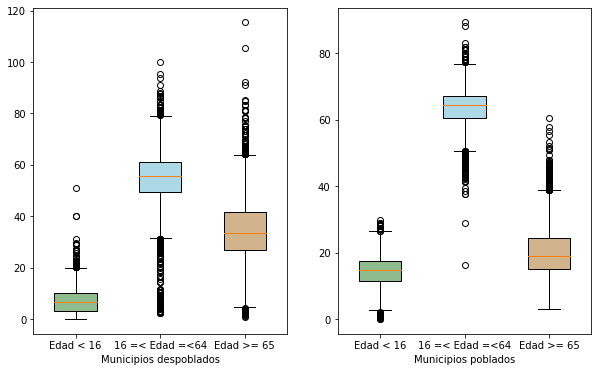

In [152]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,6))

box1 = ax1.boxplot(EdadDespoblado, patch_artist=True, widths = 0.5, labels = ['Edad < 16', '16 =< Edad =<64', 'Edad >= 65'])
box2 = ax2.boxplot(EdadPoblado, patch_artist=True, widths = 0.5, labels = ['Edad < 16', '16 =< Edad =<64', 'Edad >= 65'])

colors = ['darkseagreen', 'lightblue', 'tan']
for patch, color in zip(box1['boxes'], colors):
    patch.set_facecolor(color)
for patch, color in zip(box2['boxes'], colors):
    patch.set_facecolor(color)
    
ax1.set_xlabel('Municipios despoblados')
ax2.set_xlabel('Municipios poblados')

plt.show()

Número de personas extranjeras segmentadas por municipios despoblados y poblados:

In [153]:
Poblado['PorcentHombre'] = (Poblado['Nº Hombres Extranjeros'] / Poblado['Poblacion Total'])*100
Despoblado['PorcentHombre'] = (Despoblado['Nº Hombres Extranjeros'] / Despoblado['Poblacion Total'])*100
Poblado['PorcentMujer'] = (Poblado['Nº Mujeres Extranjeras'] / Poblado['Poblacion Total'])*100
Despoblado['PorcentMujer'] = (Despoblado['Nº Mujeres Extranjeras'] / Despoblado['Poblacion Total'])*100

ExtranDespoblado = Despoblado[['PorcentHombre', 'PorcentMujer']]
ExtranPoblado = Poblado[['PorcentHombre', 'PorcentMujer']]

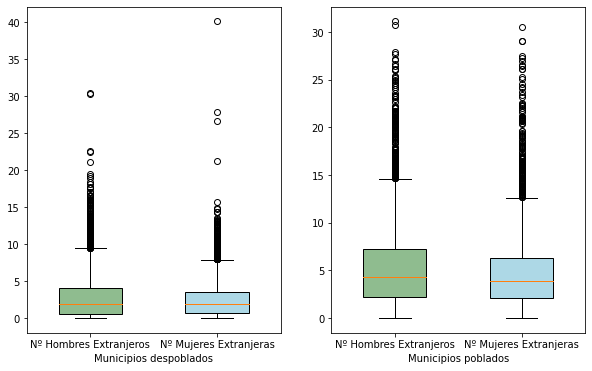

In [154]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,6))

box1 = ax1.boxplot(ExtranDespoblado, patch_artist=True, widths = 0.5, labels = ['Nº Hombres Extranjeros', 'Nº Mujeres Extranjeras'])
box2 = ax2.boxplot(ExtranPoblado, patch_artist=True, widths = 0.5, labels = ['Nº Hombres Extranjeros', 'Nº Mujeres Extranjeras'])

colors = ['darkseagreen', 'lightblue']
for patch, color in zip(box1['boxes'], colors):
    patch.set_facecolor(color)
for patch, color in zip(box2['boxes'], colors):
    patch.set_facecolor(color)
    
ax1.set_xlabel('Municipios despoblados')
ax2.set_xlabel('Municipios poblados')

plt.show()

Número de hogares unipersonales y familiares segmentadas por municipios despoblados y poblados:

In [155]:
HogarDespoblado = Despoblado[['Hogares Unipersonales', 'Hogares Familiares']]
HogarPoblado = Poblado[['Hogares Unipersonales', 'Hogares Familiares']]

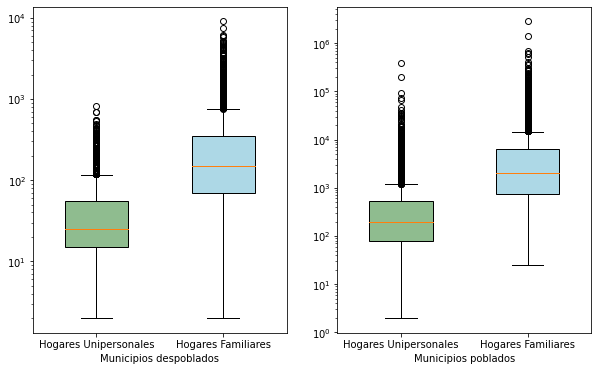

In [156]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,6))

box1 = ax1.boxplot(HogarDespoblado, patch_artist=True, widths = 0.5, 
                   labels = ['Hogares Unipersonales', 'Hogares Familiares'])
box2 = ax2.boxplot(HogarPoblado, patch_artist=True, widths = 0.5, 
                   labels = ['Hogares Unipersonales', 'Hogares Familiares'])

colors = ['darkseagreen', 'lightblue']
for patch, color in zip(box1['boxes'], colors):
    patch.set_facecolor(color)
for patch, color in zip(box2['boxes'], colors):
    patch.set_facecolor(color)
    
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xlabel('Municipios despoblados')
ax2.set_xlabel('Municipios poblados')

plt.show()

### Matriz de correlación

Al tener muchas variables, imposible realizar un mapa de calor.  
Optamos por listar las variables con sus correspondientes correlaciones.

In [157]:
Corr = Despoblacion.corr()
ParesCorr = Corr.unstack()
ParesCorr = ParesCorr.sort_values(ascending = False)
print(ParesCorr.to_string())

Poblacion Total                          Poblacion Total                            1.000000
Nº Centros Sanitarios                    Nº Centros Sanitarios                      1.000000
Número de transacciones anuales 2011     Número de transacciones anuales 2011       1.000000
Nº Residencias Mayores                   Nº Residencias Mayores                     1.000000
Nº Instituciones Religiosas y Militares  Nº Instituciones Religiosas y Militares    1.000000
Nº Hombres Extranjeros                   Nº Hombres Extranjeros                     1.000000
Nº Mujeres Extranjeras                   Nº Mujeres Extranjeras                     1.000000
Nº Total Extranjeros                     Nº Total Extranjeros                       1.000000
Nº Hombres Otra CCAA                     Nº Hombres Otra CCAA                       1.000000
Nº Mujeres Otra CCAA                     Nº Mujeres Otra CCAA                       1.000000
Nº Total Otra CCAA                       Nº Total Otra CCAA           

Ponemos el foco en las correlacones de las variables predicitivas respecto a la variable objetivo:

In [158]:
Corr = Despoblacion.corr()
Corr[['Umbral']].sort_values(by = 'Umbral',ascending = False).style.background_gradient()

,Umbral
Umbral,1.000000
Nº edificios,0.285550
Nº Explotaciones Agrícolas,0.282789
Nº Establecimientos Agricultura,0.196297
Densidad Poblacion,0.187983
Nº Establecimientos Industria,0.158666
Nº Explotaciones Ganaderas,0.149961
Otros Usos,0.143734
Sin Estudios,0.137541
Nº Centros Educativos,0.136490
